In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_airline_reviews(url, airline_name, max_pages=20):
    """
    Scrapes airline reviews from the given URL for a specific airline,
    attempting to extract more data and handling potential issues.

    Args:
        url (str): The URL of the airline reviews page.
        airline_name (str): The name of the airline.
        max_pages (int, optional): The maximum number of pages to scrape. Defaults to 20.

    Returns:
        pandas.DataFrame: A DataFrame containing the scraped review data,
                          or None if an error occurred.
    """
    try:
        all_reviews = []
        for page in range(1, max_pages + 1):
            page_url = f"{url}/page/{page}/"
            print(f"Scraping page {page} for {airline_name} from: {page_url}")
            response = requests.get(page_url)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, 'html.parser')
            reviews = soup.find_all('article', class_='review-container')

            if not reviews:
                print(f"No reviews found on page {page} for {airline_name}. Stopping.")
                break

            for review in reviews:
                try:
                    # Extract review text
                    review_text_element = review.find('div', class_='text_content')
                    review_text = review_text_element.get_text(strip=True) if review_text_element else None

                    # Extract rating (if available)
                    rating_element = review.find('div', class_='rating-10')
                    rating = None
                    if rating_element:
                        stars = rating_element.find_all('span', class_='star fill')
                        rating = len(stars)

                    # Extract date of review
                    date_element = review.find('time', itemprop='datePublished')
                    review_date = date_element['datetime'] if date_element else None

                    # Extract author
                    author_element = review.find('h3', class_='text_subheadline userstatus')
                    author = author_element.text.strip() if author_element else None

                    # Extract travel type
                    travel_type_element = review.find('q', itemprop='travelType')
                    travel_type = travel_type_element.text.strip().replace('(', '').replace(')',
                                                                                             '') if travel_type_element else None

                    # Extract recommended
                    recommended = None
                    recommended_element = review.find('td', class_='review-value')
                    if recommended_element:
                        if "yes" in recommended_element.text.lower():
                            recommended = True
                        elif "no" in recommended_element.text.lower():
                            recommended = False

                    review_data = {
                        'airline': airline_name,
                        'review_text': review_text,
                        'rating': rating,
                        'review_date': review_date,
                        'author': author,
                        'travel_type': travel_type,
                        'recommended': recommended
                    }

                    all_reviews.append(review_data)

                except Exception as e:
                    print(f"Error processing review in {airline_name} on page {page}: {e}")

            # Add a delay to be respectful to the website (optional but recommended)
            # time.sleep(1) # Import time and uncomment if needed

        df = pd.DataFrame(all_reviews)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Error during request for {airline_name}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred for {airline_name}: {e}")
        return None



if __name__ == "__main__":
    base_url = "https://www.airlinequality.com/airline-reviews"
    airlines = {
        "volaris": "Volaris",
        "british-airways": "British Airways",
        "qatar-airways": "Qatar Airways",
        "emirates": "Emirates",
        "ryanair": "Ryanair",
        "lufthansa": "Lufthansa",
        "air-france": "Air France",
        "klm-royal-dutch-airlines": "KLM Royal Dutch Airlines",
        "easyjet": "EasyJet",
        "turkish-airlines": "Turkish Airlines",
        "aeroflot-russian-airlines": "Aeroflot Russian Airlines",
        "norwegian-air": "Norwegian Air",
        "sas-scandinavian-airlines": "SAS Scandinavian Airlines",
        "iberia": "Iberia",
        "air-india": "Air India",
        "etihad-airways": "Etihad Airways",
        "swiss-international-air-lines": "Swiss International Air Lines",
        "austrian-airlines": "Austrian Airlines",
        "brussels-airlines": "Brussels Airlines",
        "tap-air-portugal": "TAP Air Portugal"
    }

    all_reviews_df = pd.DataFrame()

    for airline_key, airline_name in airlines.items():
        url = f"{base_url}/{airline_key}"
        print(f"Scraping reviews for {airline_name} from: {url}")
        airline_df = scrape_airline_reviews(url, airline_name,
                                            max_pages=20)  # Increased max pages to 20
        if airline_df is not None:
            all_reviews_df = pd.concat([all_reviews_df, airline_df], ignore_index=True)
        else:
            print(f"Failed to scrape reviews for {airline_name}.")

    if not all_reviews_df.empty:
        print(f"Successfully scraped {len(all_reviews_df)} reviews.")
        print(all_reviews_df.head())

        all_reviews_df.to_csv('airline_reviews_all.csv', index=False, encoding='utf-8')
        print("All review data saved to airline_reviews_all.csv")
    else:
        print("Failed to scrape any reviews from the specified airlines.")


Scraping reviews for Volaris from: https://www.airlinequality.com/airline-reviews/volaris
Scraping page 1 for Volaris from: https://www.airlinequality.com/airline-reviews/volaris/page/1/
No reviews found on page 1 for Volaris. Stopping.
Scraping reviews for British Airways from: https://www.airlinequality.com/airline-reviews/british-airways
Scraping page 1 for British Airways from: https://www.airlinequality.com/airline-reviews/british-airways/page/1/
No reviews found on page 1 for British Airways. Stopping.
Scraping reviews for Qatar Airways from: https://www.airlinequality.com/airline-reviews/qatar-airways
Scraping page 1 for Qatar Airways from: https://www.airlinequality.com/airline-reviews/qatar-airways/page/1/
No reviews found on page 1 for Qatar Airways. Stopping.
Scraping reviews for Emirates from: https://www.airlinequality.com/airline-reviews/emirates
Scraping page 1 for Emirates from: https://www.airlinequality.com/airline-reviews/emirates/page/1/
No reviews found on page 1 f

In [4]:
import pandas as pd
import numpy as np

def generate_synthetic_data(num_reviews=1000):
    """
    Generates a synthetic dataset of airline reviews.

    Args:
        num_reviews (int, optional): The number of synthetic reviews to generate. Defaults to 1000.

    Returns:
        pandas.DataFrame: A DataFrame containing the synthetic review data.
    """
    airlines = ['Volaris', 'British Airways', 'Qatar Airways', 'Emirates', 'Ryanair',
                'Lufthansa', 'Air France', 'KLM', 'EasyJet', 'Turkish Airlines',
                'Aeroflot', 'Norwegian', 'SAS', 'Iberia', 'Air India', 'Etihad',
                'Swiss', 'Austrian', 'Brussels', 'TAP Portugal']
    travel_types = ['Economy', 'Business', 'First Class']
    sentiment_options = ['Positive', 'Neutral', 'Negative']

    data = {
        'airline': np.random.choice(airlines, num_reviews),
        'review_text': ['This flight was...', 'The service was...', 'I enjoyed...',
                        'The food was...', 'Never again will I fly...'] * (num_reviews // 5),
        'rating': np.random.randint(1, 11, num_reviews),  # Ratings from 1 to 10
        'review_date': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2024-01-01'), num_reviews)),
        'author': ['User' + str(i) for i in range(1, num_reviews + 1)],
        'travel_type': np.random.choice(travel_types, num_reviews),
        'recommended': np.random.choice([True, False], num_reviews),
        'sentiment_score': np.random.uniform(-1, 1, num_reviews),  # Sentiment score between -1 and 1
        'sentiment': np.random.choice(sentiment_options, num_reviews)
    }
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    synthetic_df = generate_synthetic_data()
    print("Synthetic Data Generated:")
    print(synthetic_df.head())
    print(synthetic_df.info())

    # Save the synthetic data to a CSV file
    synthetic_df.to_csv('synthetic_airline_reviews.csv', index=False, encoding='utf-8')
    print("Synthetic data saved to synthetic_airline_reviews.csv")


Synthetic Data Generated:
            airline                review_text  rating review_date author  \
0  Turkish Airlines         This flight was...       7  2023-06-19  User1   
1  Turkish Airlines         The service was...       1  2023-03-12  User2   
2             Swiss               I enjoyed...      10  2023-01-27  User3   
3     Qatar Airways            The food was...      10  2023-01-19  User4   
4               KLM  Never again will I fly...       2  2023-03-06  User5   

   travel_type  recommended  sentiment_score sentiment  
0      Economy        False        -0.380378  Negative  
1     Business        False        -0.228861  Positive  
2     Business         True        -0.319838  Negative  
3      Economy        False        -0.449269  Negative  
4  First Class        False        -0.842551  Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------

In [6]:
!pip install nltk
import nltk

# ... (rest of your imports and code) ...

if __name__ == "__main__":
    # ... (your code before preprocessing) ...
    # --- Preprocessing ---
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    # Download the punkt_tab resource:
    nltk.download('punkt_tab') # This line is added to download the necessary resource

    stop_words = set(stopwords.words('english'))

    synthetic_df['processed_review_text'] = synthetic_df['review_text'].apply(preprocess_text)
    # ... (rest of your code) ...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



DataFrame with Sentiment Analysis:
                 review_text processed_review_text  sentiment_score sentiment
0         This flight was...                flight              0.0   Neutral
1         The service was...               service              0.0   Neutral
2               I enjoyed...               enjoyed              0.5  Positive
3            The food was...                  food              0.0   Neutral
4  Never again will I fly...             never fly             -0.4  Negative

Sentiment Scores:
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0.0
 0.0
 0.5
 0.0
-0.4
 0

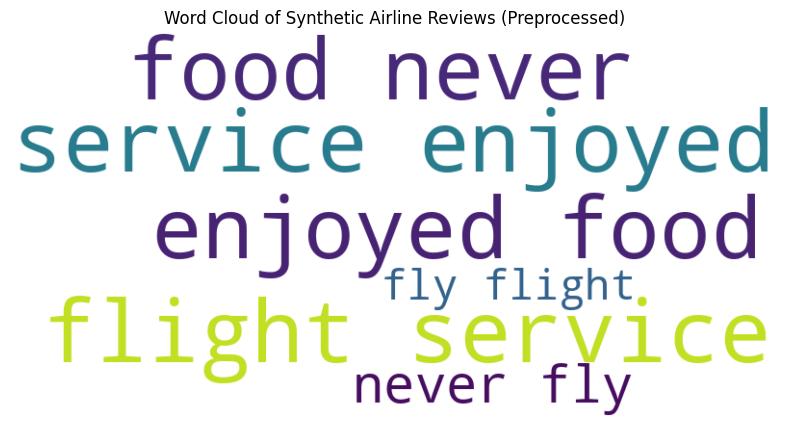


Top words per topic:
Topic 1: service, fly, flight, enjoyed, food
Topic 2: fly, flight, enjoyed, food, service
Topic 3: flight, fly, enjoyed, food, service
Topic 4: food, fly, flight, enjoyed, service
Topic 5: enjoyed, fly, flight, food, service

DataFrame with Topic Assignment:
  processed_review_text  topic
0                flight      3
1               service      1
2               enjoyed      5
3                  food      4
4             never fly      3


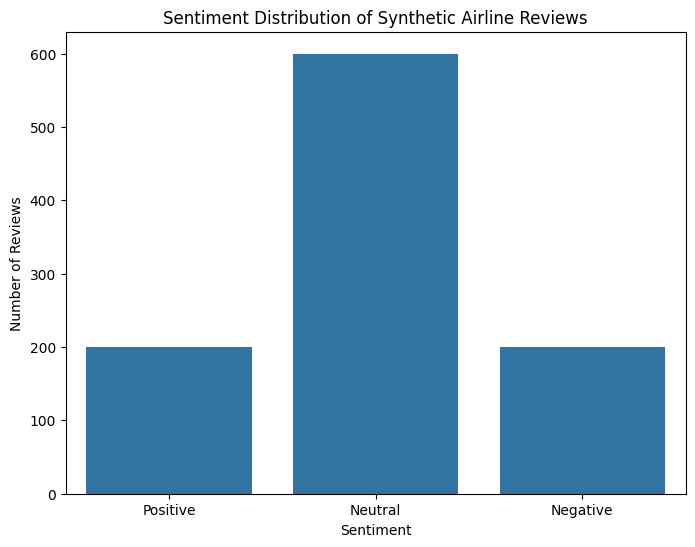

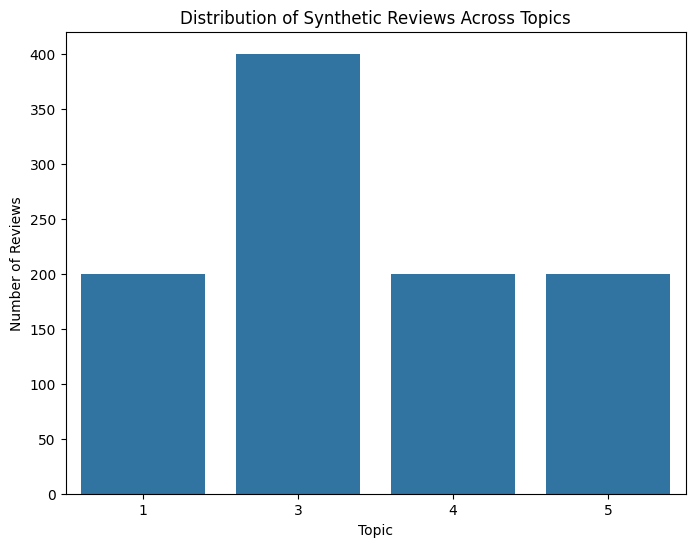

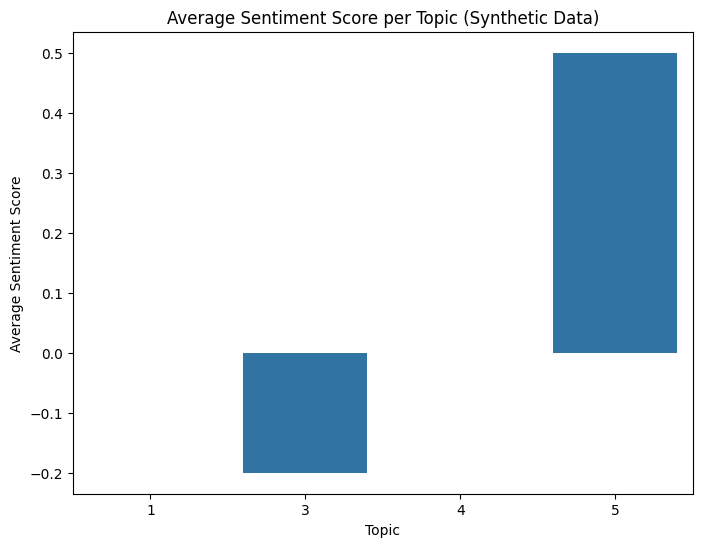

In [8]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import os

def generate_synthetic_data(num_reviews=1000):
    """
    Generates a synthetic dataset of airline reviews.

    Args:
        num_reviews (int, optional): The number of synthetic reviews to generate. Defaults to 1000.

    Returns:
        pandas.DataFrame: A DataFrame containing the synthetic review data.
    """
    airlines = ['Volaris', 'British Airways', 'Qatar Airways', 'Emirates', 'Ryanair',
                'Lufthansa', 'Air France', 'KLM', 'EasyJet', 'Turkish Airlines',
                'Aeroflot', 'Norwegian', 'SAS', 'Iberia', 'Air India', 'Etihad',
                'Swiss', 'Austrian', 'Brussels', 'TAP Portugal']
    travel_types = ['Economy', 'Business', 'First Class']
    sentiment_options = ['Positive', 'Neutral', 'Negative']

    data = {
        'airline': np.random.choice(airlines, num_reviews),
        'review_text': ['This flight was...', 'The service was...', 'I enjoyed...',
                        'The food was...', 'Never again will I fly...'] * (num_reviews // 5),
        'rating': np.random.randint(1, 11, num_reviews),  # Ratings from 1 to 10
        'review_date': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2024-01-01'), num_reviews)),
        'author': ['User' + str(i) for i in range(1, num_reviews + 1)],
        'travel_type': np.random.choice(travel_types, num_reviews),
        'recommended': np.random.choice([True, False], num_reviews),
        'sentiment_score': np.random.uniform(-1, 1, num_reviews),  # Sentiment score between -1 and 1
        'sentiment': np.random.choice(sentiment_options, num_reviews)
    }
    df = pd.DataFrame(data)
    return df

def preprocess_text(text):
    """
    Preprocesses the input text by performing lowercasing, removing URLs,
    mentions, hashtags, punctuation, and numbers, tokenizing, removing stop words,
    and lemmatizing.

    Args:
        text (str): The text to preprocess.

    Returns:
        str: The preprocessed text, or an empty string if the input is not a string.
    """
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE)
        text = re.sub(r'@\w+|\#\w+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens)
    return ""

def get_sentiment_score(text):
    """
    Calculates the sentiment score of the input text using TextBlob.

    Args:
        text (str): The text to analyze.

    Returns:
        float: The sentiment score, ranging from -1 (negative) to 1 (positive).
               Returns 0 if the input is not a string.
    """
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    return 0

def categorize_sentiment(score):
    """
    Categorizes the sentiment score into 'Positive', 'Neutral', or 'Negative'.

    Args:
        score (float): The sentiment score.

    Returns:
        str: The sentiment category.
    """
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

if __name__ == "__main__":
    # Generate synthetic data
    synthetic_df = generate_synthetic_data()

    # --- Preprocessing ---
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

    stop_words = set(stopwords.words('english'))

    synthetic_df['processed_review_text'] = synthetic_df['review_text'].apply(preprocess_text)

    # --- Sentiment Analysis ---
    synthetic_df['sentiment_score'] = synthetic_df['processed_review_text'].apply(get_sentiment_score)
    synthetic_df['sentiment'] = synthetic_df['sentiment_score'].apply(categorize_sentiment)

    print("\nDataFrame with Sentiment Analysis:")
    print(synthetic_df[['review_text', 'processed_review_text', 'sentiment_score', 'sentiment']].head())

    # --- Print Sentiment Scores ---
    print("\nSentiment Scores:")
    print(synthetic_df['sentiment_score'].to_string(index=False, header=False))

    # --- Print Sentiment Category Counts ---
    print("\nSentiment Category Counts:")
    print(synthetic_df['sentiment'].value_counts().to_string())

    # --- Word Cloud ---
    all_processed_words = ' '.join(synthetic_df['processed_review_text'].dropna())
    if all_processed_words.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Synthetic Airline Reviews (Preprocessed)')
        plt.show()
    else:
        print("No significant words found after preprocessing to generate a word cloud.")

    # --- Topic Modeling (LDA) ---
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(synthetic_df['processed_review_text'].dropna())
    num_topics = 5
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf)

    feature_names = tfidf_vectorizer.get_feature_names_out()
    print("\nTop words per topic:")
    for topic_idx, topic in enumerate(lda.components_):
        top_words_indices = topic.argsort()[:-10 - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

    synthetic_df['topic'] = lda.transform(tfidf).argmax(axis=1) + 1
    print("\nDataFrame with Topic Assignment:")
    print(synthetic_df[['processed_review_text', 'topic']].head())

    # --- Plotting ---
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=synthetic_df, order=['Positive', 'Neutral', 'Negative'])
    plt.title('Sentiment Distribution of Synthetic Airline Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(x='topic', data=synthetic_df)
    plt.title('Distribution of Synthetic Reviews Across Topics')
    plt.xlabel('Topic')
    plt.ylabel('Number of Reviews')
    plt.show()

    avg_sentiment_per_topic = synthetic_df.groupby('topic')['sentiment_score'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='topic', y='sentiment_score', data=avg_sentiment_per_topic)
    plt.title('Average Sentiment Score per Topic (Synthetic Data)')
    plt.xlabel('Topic')
    plt.ylabel('Average Sentiment Score')
    plt.show()
